In [ ]:
# Task 2: Customer Segmentation Using Unsupervised Learning

## Problem Statement & Objective
The objective of this task is to segment mall customers based on their spending behavior using unsupervised learning.
By identifying distinct customer groups, we can design targeted marketing strategies for each segment.

In [ ]:
# Dataset Description

## Dataset:
Mall Customers Dataset

## Features:
-CustomerID – Unique customer identifier
-Gender – Male/Female
-Age – Customer age
-Annual Income (k$) – Annual income in thousands
-Spending Score (1-100) – Spending behavior score assigned by the mall

In [2]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [12]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first 5 rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Data Inspection & Cleaning

## Dataset shape
df.shape


(200, 5)

In [14]:
## Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
## Check missing values
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Observation:
-No missing values
-Dataset is clean and ready for analysis


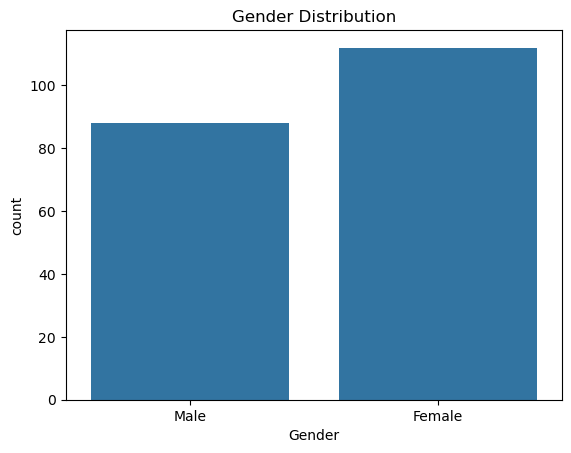

In [16]:
# Exploratory Data Analysis (EDA)

## Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


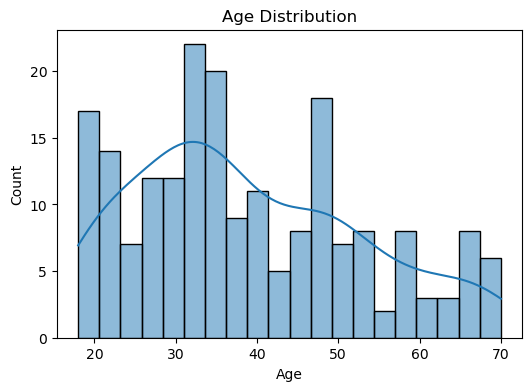

In [17]:
## Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


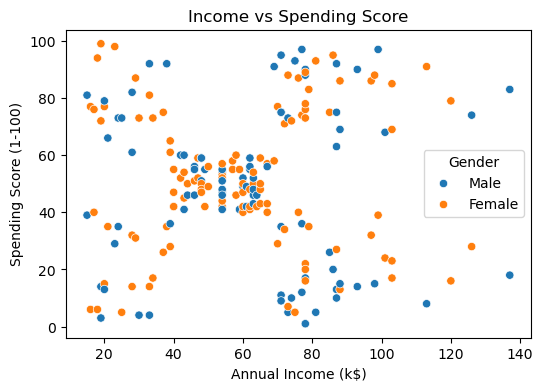

In [18]:
## Annual Income vs Spending Score
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Gender', 
    data=df
)
plt.title("Income vs Spending Score")
plt.show()

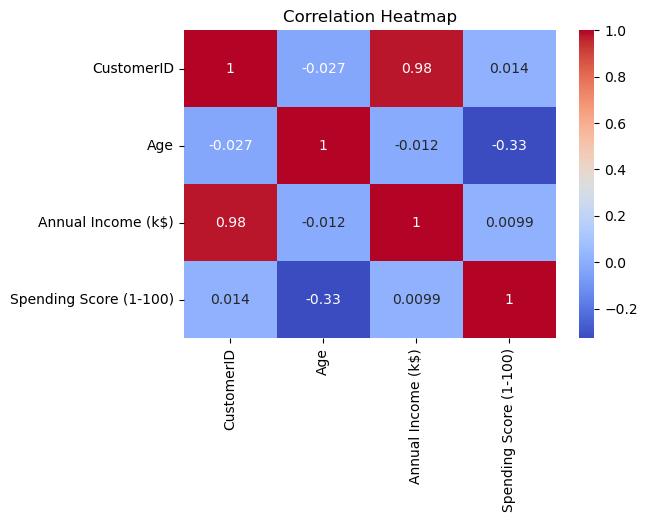

In [19]:
## Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Data Preprocessing

We use Annual Income and Spending Score for clustering.


In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

## Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


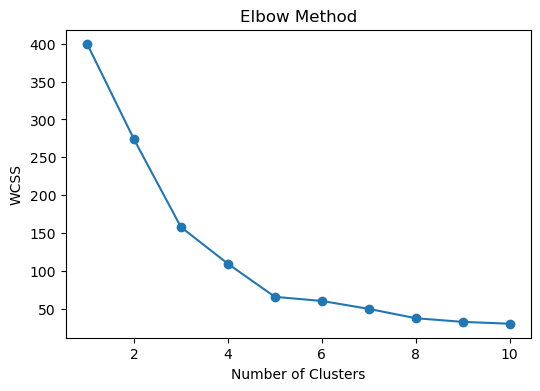

In [22]:
# Find Optimal Clusters (Elbow Method)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
# Apply K-Means Clustering

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


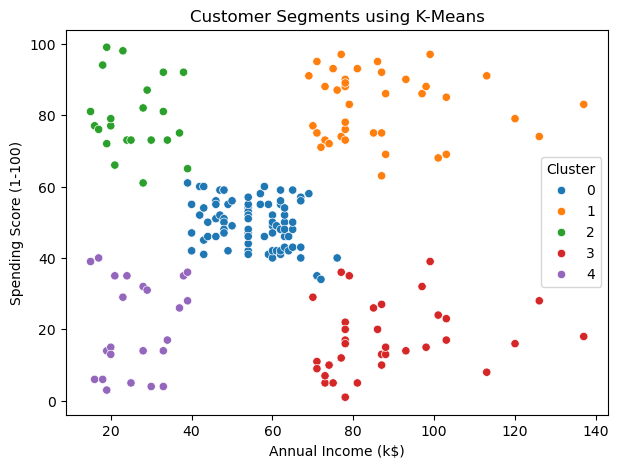

In [24]:
# Visualize Clusters (Original Space)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='tab10',
    data=df
)
plt.title("Customer Segments using K-Means")
plt.show()


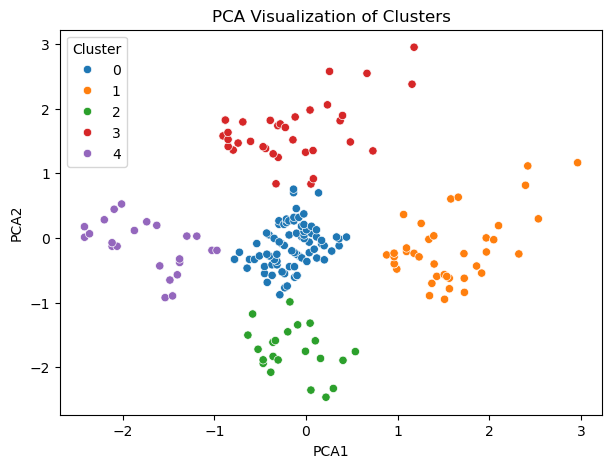

In [25]:
# Dimensionality Reduction for Visualization

## PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    palette='tab10',
    data=df
)
plt.title("PCA Visualization of Clusters")
plt.show()

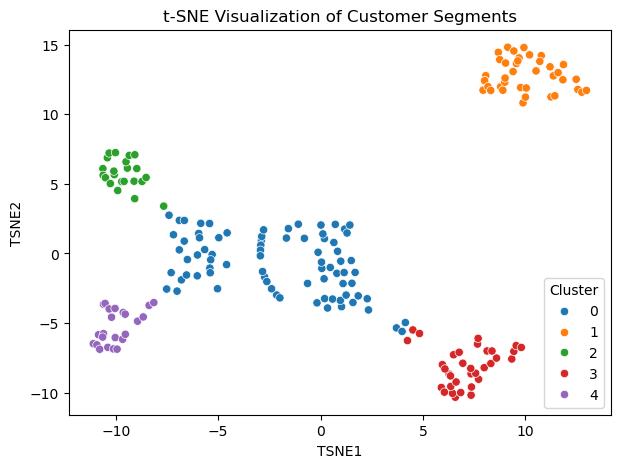

In [26]:
## t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df['TSNE1'] = X_tsne[:,0]
df['TSNE2'] = X_tsne[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='TSNE1', 
    y='TSNE2', 
    hue='Cluster', 
    palette='tab10',
    data=df
)
plt.title("t-SNE Visualization of Customer Segments")
plt.show()

In [27]:
# Cluster Interpretation

df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
# Marketing Strategy Recommendations:

🟢 Cluster 0 – High Income, High Spenders

-Premium loyalty programs
-Exclusive offers & VIP memberships
-Early access to new collections

🔵 Cluster 1 – Low Income, High Spenders

-Discount-based promotions
-Installment plans
-Flash sales

🟡 Cluster 2 – Average Income, Average Spenders

-Personalized product recommendations
-Combo deals
-Regular engagement emails

🔴 Cluster 3 – High Income, Low Spenders

-Personalized luxury recommendations
-Brand storytelling & experience-based marketing
-One-on-one consultations

🟣 Cluster 4 – Low Income, Low Spenders

-Budget-friendly products
-Awareness campaigns
-Coupons & value bundles


In [ ]:
# Final Conclusion & Insights

-K-Means effectively segmented customers into 5 meaningful groups
-PCA and t-SNE helped visualize clusters clearly
-Customer behavior varies significantly by income and spending score
-Targeted marketing strategies can increase engagement and revenue
-This approach helps businesses optimize marketing spend